In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import datetime

Sacramento_CO_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/CO/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/CO/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/CO/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/CO/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/CO/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/CO/2020.csv'])
, ignore_index=True)

In [3]:
import datetime
# the data is collected across multiple sites daily
# TODO: Consider the geographical distribution of the sites and their proximity to each other.
# this function calculates the daily average across all sites - Spatial aggregation
def calculate_daily_average(dataset, date_column, pollutant):
  # Ensure the date column is in datetime format
  dataset[date_column] = pd.to_datetime(dataset[date_column])
  dataset[date_column] = dataset[date_column].dt.date
  daily_avg = dataset.groupby(date_column)[pollutant].mean().reset_index()

  return daily_avg

In [4]:
Sacramento_CO_full = calculate_daily_average(Sacramento_CO_full, 'Date', 'Daily Max 8-hour CO Concentration')

In [5]:
# Some of the dataset contain missing dates
# this method finds those dates
def find_missing_dates(data, date_column):
  # Ensure the date column is in datetime format
  data[date_column] = pd.to_datetime(data[date_column])
  # Create a full range od dates
  min_date = data[date_column].min()
  max_date = data[date_column].max()
  full_dates = pd.date_range(start=min_date, end=max_date, freq='D')

  # Find missing dates
  missing_dates = full_dates.difference(data[date_column])

  return missing_dates

In [6]:
missing_dates = find_missing_dates(Sacramento_CO_full, 'Date')

In [7]:
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [8]:
Sacramento_NO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/NO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/NO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/NO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/NO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/NO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/NO2/2020.csv'])
, ignore_index=True)

In [9]:
Sacramento_NO2_full = calculate_daily_average(Sacramento_NO2_full, 'Date', 'Daily Max 1-hour NO2 Concentration')
missing_dates = find_missing_dates(Sacramento_NO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [10]:
Sacramento_Ozone_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/Ozone/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/Ozone/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/Ozone/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/Ozone/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/Ozone/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/Ozone/2020.csv'])
, ignore_index=True)

In [11]:
Sacramento_Ozone_full = calculate_daily_average(Sacramento_Ozone_full, 'Date', 'Daily Max 8-hour Ozone Concentration')
missing_dates = find_missing_dates(Sacramento_Ozone_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)


In [12]:
def process_data(data,  date_column, missing_dates):
  # Convert 'Date' column to datetime if it is not already
  data[date_column] = pd.to_datetime(data[date_column])

  # Set 'Date' as the index
  data.set_index(date_column, inplace=True)

  # Add the missing dates to the DataFrame with NaN values
  data = data.reindex(data.index.union(missing_dates))

  #Reset index to make 'Date' a regular column again
  data.reset_index(inplace=True)

  data.fillna(0, inplace=True)

  return data


In [13]:
Sacramento_Ozone_full = process_data(Sacramento_Ozone_full, 'Date', missing_dates)

In [14]:
# manually add 2020-12-31
new_entry = {'index': pd.to_datetime('2020-12-31'), 'Daily Max 8-hour Ozone Concentration': 0.0326668}
Sacramento_Ozone_full.loc[len(Sacramento_Ozone_full)] = new_entry

In [15]:
Sacramento_Ozone_full.reset_index(drop=True, inplace=True)

In [16]:
Sacramento_PM2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM2.5/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM2.5/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM2.5/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM2.5/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM2.5/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM2.5/2020.csv'])
, ignore_index=True)

In [17]:
Sacramento_PM2_full = calculate_daily_average(Sacramento_PM2_full, 'Date', 'Daily Mean PM2.5 Concentration')
missing_dates = find_missing_dates(Sacramento_PM2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [18]:
Sacramento_PM10_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM10/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM10/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM10/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM10/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM10/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/PM10/2020.csv'])
, ignore_index=True)

In [19]:
Sacramento_PM10_full = calculate_daily_average(Sacramento_PM10_full, 'Date', 'Daily Mean PM10 Concentration')
missing_dates = find_missing_dates(Sacramento_PM10_full, 'Date')
print(missing_dates)

DatetimeIndex(['2017-08-22', '2017-08-24', '2017-08-25', '2017-08-26',
               '2017-08-27', '2017-08-28', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-05',
               '2017-09-17', '2017-09-18', '2017-11-22', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-02-05', '2018-06-14',
               '2018-06-15', '2018-06-16', '2018-06-17', '2018-06-18',
               '2018-07-11', '2018-07-12', '2018-07-14', '2018-07-15',
               '2018-07-16', '2018-07-17', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24', '2019-11-04', '2020-04-17',
               '2020-04-18', '2020-04-20', '2020-06-22', '2020-06-23',
               '2020-06-24'],
              dtype='datetime64[ns]', freq=None)


In [20]:
Sacramento_SO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/SO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/SO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/SO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/SO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/SO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Sacramento/SO2/2020.csv'])
, ignore_index=True)

In [21]:
Sacramento_SO2_full = calculate_daily_average(Sacramento_SO2_full, 'Date', 'Daily Max 1-hour SO2 Concentration')
missing_dates = find_missing_dates(Sacramento_SO2_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-02-04', '2015-02-05', '2015-03-05', '2015-04-02',
               '2015-04-07', '2015-04-15', '2015-04-16', '2015-04-17',
               '2015-06-01', '2015-07-19',
               ...
               '2019-10-08', '2020-04-21', '2020-09-24', '2020-10-13',
               '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
               '2020-10-18', '2020-10-19'],
              dtype='datetime64[ns]', length=223, freq=None)


In [22]:
Sacramento_SO2_full = process_data(Sacramento_SO2_full, 'Date', missing_dates)

In [23]:
Sacramento_CO_full.rename(columns = {'index':'Date'}, inplace = True)
Sacramento_NO2_full.rename(columns = {'index':'Date'}, inplace = True)
Sacramento_Ozone_full.rename(columns = {'index':'Date'}, inplace = True)
Sacramento_PM2_full.rename(columns = {'index':'Date'}, inplace = True)
Sacramento_PM10_full.rename(columns = {'index':'Date'}, inplace = True)
Sacramento_SO2_full.rename(columns = {'index':'Date'}, inplace = True)

In [24]:
from functools import reduce
combine = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [Sacramento_CO_full,Sacramento_NO2_full,Sacramento_Ozone_full,Sacramento_PM2_full,Sacramento_PM10_full,Sacramento_SO2_full])

In [25]:
combine.head()

,Date,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Daily Mean PM10 Concentration,Daily Max 1-hour SO2 Concentration
0,2015-01-01,0.833333,26.46,0.028286,37.850,24.0,1.1
1,2015-01-02,1.133333,31.62,0.024286,41.425,27.5,1.2
2,2015-01-03,1.066667,29.58,0.025000,35.500,26.5,0.7
3,2015-01-04,1.133333,28.06,0.025000,36.975,23.0,0.7
4,2015-01-05,1.033333,28.70,0.018000,26.650,26.5,0.7


In [26]:
combine.rename(columns = {'Daily Max 8-hour CO Concentration':'CO', 'Daily Max 1-hour NO2 Concentration': 'NO2',
                          'Daily Max 8-hour Ozone Concentration': 'Ozone', 'Daily Mean PM2.5 Concentration': 'PM2.5',
                          'Daily Mean PM10 Concentration': 'PM10', 'Daily Max 1-hour SO2 Concentration': 'SO2' }, inplace = True)

In [27]:
combine

,Date,CO,NO2,Ozone,PM2.5,PM10,SO2
0,2015-01-01,0.833333,26.460000,0.028286,37.850,24.0,1.1
1,2015-01-02,1.133333,31.620000,0.024286,41.425,27.5,1.2
2,2015-01-03,1.066667,29.580000,0.025000,35.500,26.5,0.7
3,2015-01-04,1.133333,28.060000,0.025000,36.975,23.0,0.7
4,2015-01-05,1.033333,28.700000,0.018000,26.650,26.5,0.7
...,...,...,...,...,...,...,...
2187,2020-12-27,0.600000,13.633333,0.022667,6.400,7.0,0.1
2188,2020-12-28,0.650000,25.200000,0.031167,5.540,11.0,0.7
2189,2020-12-29,0.850000,26.633333,0.022400,9.420,17.2,0.7
2190,2020-12-30,0.800000,17.250000,0.025600,12.720,21.0,0.2


In [28]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [29]:
# descriptive statistics of the data
print(combine.describe())

                CO          NO2        Ozone        PM2.5         PM10  \
count  2192.000000  2192.000000  2192.000000  2192.000000  2151.000000   
mean      0.453653    14.805987     0.040786     9.967632    21.305188   
std       0.283103     8.196403     0.012977    11.324674    21.255499   
min       0.100000     1.600000     0.000000     0.550000     1.000000   
25%       0.266667     8.019167     0.032667     4.825000    10.900000   
50%       0.350000    13.407143     0.040167     7.179167    16.500000   
75%       0.600000    20.125000     0.049286    11.121250    25.000000   
max       3.900000    55.500000     0.087833   165.816667   298.000000   

               SO2  
count  2192.000000  
mean      1.572263  
std       1.537665  
min       0.000000  
25%       0.500000  
50%       1.100000  
75%       2.300000  
max       9.700000  


In [30]:
# show intensity of each pollutant over time
fig = go.Figure()

for pollutant in ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']:
  fig.add_trace(go.Scatter(x=combine['Date'], y=combine[pollutant], mode='lines',
                           name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Sacramento',
                  xaxis_title='Date', yaxis_title='Concentration (ug/m3)')

fig.show()

In [31]:
#Calculate Air Quality Index
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
  for low, high, aqi in aqi_breakpoints:
    if low <= concentration <= high:
      return aqi
  return None

def calculate_overall_aqi(row):
  aqi_values = []
  pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
  for pollutant in pollutants:
    aqi = calculate_aqi(pollutant, row[pollutant])
    if aqi is not None:
      aqi_values.append(aqi)
  return max(aqi_values)


# Calculate AQI for each row
combine['AQI'] = combine.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
  for low, high, category in aqi_categories:
    if low <= aqi_value <= high:
      return category
  return None

In [32]:
#Categorize AQI
combine['AQI Category'] = combine['AQI'].apply(categorize_aqi)
print(combine.head())

        Date        CO    NO2     Ozone   PM2.5  PM10  SO2  AQI  \
0 2015-01-01  0.833333  26.46  0.028286  37.850  24.0  1.1  150   
1 2015-01-02  1.133333  31.62  0.024286  41.425  27.5  1.2  150   
2 2015-01-03  1.066667  29.58  0.025000  35.500  26.5  0.7  150   
3 2015-01-04  1.133333  28.06  0.025000  36.975  23.0  0.7  150   
4 2015-01-05  1.033333  28.70  0.018000  26.650  26.5  0.7  100   

                     AQI Category  
0  Unhealthy for Sensitive Groups  
1  Unhealthy for Sensitive Groups  
2  Unhealthy for Sensitive Groups  
3  Unhealthy for Sensitive Groups  
4                        Moderate  


In [33]:
asthma_data = pd.read_csv('gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/asthma-hospitalization-rates-by-county.csv', encoding="ISO-8859-1")

asthma_data['NUMBER OF HOSPITALIZATIONS'] = asthma_data['NUMBER OF HOSPITALIZATIONS'].str.replace(',', '').astype(float)

print(asthma_data.head())

       COUNTY  YEAR            STRATA STRATA NAME AGE GROUP  \
0  California  2015  Total population    All ages  All ages   
1     Alameda  2015  Total population    All ages  All ages   
2      Alpine  2015  Total population    All ages  All ages   
3      Amador  2015  Total population    All ages  All ages   
4       Butte  2015  Total population    All ages  All ages   

   NUMBER OF HOSPITALIZATIONS  AGE-ADJUSTED HOSPITALIZATION RATE COMMENT  
0                     27262.0                                7.0     NaN  
1                      1435.0                                9.3     NaN  
2                         0.0                                0.0     NaN  
3                        28.0                                7.5     NaN  
4                       143.0                                6.7     NaN  


In [34]:
combine['COUNTY'] = 'Sacramento'

In [35]:
combine['Date'] = pd.to_datetime(combine['Date'])
combine_yearly = combine.groupby(['COUNTY',combine['Date'].dt.year]).mean().reset_index()
combine_yearly.rename(columns = {'Date':'YEAR'}, inplace = True)
merged_data = pd.merge(asthma_data, combine_yearly, how='inner', left_on=['COUNTY', 'YEAR'], right_on=['COUNTY', 'YEAR'])
# Perform correlation analysis
correlation_matrix = merged_data[['NUMBER OF HOSPITALIZATIONS', 'CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI']].corr()

<ipython-input-35-28fbee1b0bae>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [36]:
merged_data.head(5)

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE,COMMENT,CO,NO2,Ozone,PM2.5,PM10,SO2,AQI
0,Sacramento,2015,Total population,All ages,All ages,1138.0,7.7,NaN,0.403744,16.106949,0.040788,9.7565,15.856383,2.277808,93.835616
1,Sacramento,2015,Child vs. adult,017 years,017 years,469.0,12.8,NaN,0.403744,16.106949,0.040788,9.7565,15.856383,2.277808,93.835616
2,Sacramento,2015,Child vs. adult,18+ years,18+ years,669.0,5.9,NaN,0.403744,16.106949,0.040788,9.7565,15.856383,2.277808,93.835616
3,Sacramento,2015,Age groups,04 years,04 years,235.0,23.4,NaN,0.403744,16.106949,0.040788,9.7565,15.856383,2.277808,93.835616
4,Sacramento,2015,Age groups,517 years,517 years,234.0,9.0,NaN,0.403744,16.106949,0.040788,9.7565,15.856383,2.277808,93.835616


In [37]:
print(correlation_matrix)

                            NUMBER OF HOSPITALIZATIONS        CO       NO2  \
NUMBER OF HOSPITALIZATIONS                    1.000000 -0.083285 -0.067962   
CO                                           -0.083285  1.000000 -0.236670   
NO2                                          -0.067962 -0.236670  1.000000   
Ozone                                         0.039074 -0.144102 -0.432192   
PM2.5                                        -0.114635  0.334156  0.013060   
SO2                                           0.191409  0.215243  0.333883   
AQI                                          -0.252870  0.205451 -0.087423   

                               Ozone     PM2.5       SO2       AQI  
NUMBER OF HOSPITALIZATIONS  0.039074 -0.114635  0.191409 -0.252870  
CO                         -0.144102  0.334156  0.215243  0.205451  
NO2                        -0.432192  0.013060  0.333883 -0.087423  
Ozone                       1.000000  0.704864 -0.635056  0.645975  
PM2.5                       0.

In [ ]:
# AQI over time
fig = px.bar(combine, x="Date", y="AQI",
             title="AQI of Sacramento from 2015 - 2020")
fig.update_xaxes(title='Date')
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# AQI Category distribution
fig = px.histogram(combine, x="Date",
                   color="AQI Category",
                   title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Distribution of Pollutants in the air quality of Los Angeles
pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = combine[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Riverside",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = combine[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [38]:
# Correlation Between Pollutants and Number of Hospitalization
parameters = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI', 'NUMBER OF HOSPITALIZATIONS']
correlation_matrix = merged_data[parameters].corr()
fig = px.imshow(correlation_matrix, x=parameters, y=parameters, title="Correlation Between Pollutants and No. of Hospitalization")
fig.show()

In [ ]:
combine['Day_of_Week'] = combine['Date'].dt.day_name()
average_aqi_by_day = combine.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y="AQI",
              title="Average AQI by Day Trends in Sacramento")
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
combine['Year'] = combine['Date'].dt.year
average_aqi_by_year = combine.groupby('Year')['AQI'].mean()

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_year, x=average_aqi_by_year.index, y="AQI",
              title="Average AQI by Year Trends in Sacramento")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import calendar
combine['Month'] = combine['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
average_aqi_by_month = combine.groupby('Month')['AQI'].mean()
# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_month, x=average_aqi_by_month.index, y="AQI",
              title="Average AQI by Month Trends in Sacramento")
fig.update_xaxes(title="Months")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Convert 'Date' to datetime and set it as the index
combine['Date'] = pd.to_datetime(combine['Date'])
combine.set_index('Date', inplace=True)

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
combine['AQI_scaled'] = scaler.fit_transform(combine['AQI'].values.reshape(-1,1))

In [ ]:
# Define sequence length and number of future time steps to predict
sequence_length = 30
#num_future_steps = 3 # Adjust according to needs

# function to create sequences for LSTM
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
 #Create sequences with multiple future time steps
X, y = create_sequences(combine['AQI_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
#X_train = X_train.reshape((X_train.shape[0], sequence_length, len(target_variable)))
#X_test = X_test.reshape((X_test.shape[0], sequence_length, len(target_variable )))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model.compile(optimizer='adam', loss='mse')

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 2s 22ms/step - loss: 0.0076 - val_loss: 0.0087
Epoch 2/50
44/44 [==============================] - 1s 22ms/step - loss: 0.0050 - val_loss: 0.0079
Epoch 3/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0047 - val_loss: 0.0078
Epoch 4/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0047 - val_loss: 0.0079
Epoch 5/50
44/44 [==============================] - 1s 26ms/step - loss: 0.0046 - val_loss: 0.0078
Epoch 6/50
44/44 [==============================] - 1s 27ms/step - loss: 0.0045 - val_loss: 0.0081
Epoch 7/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0045 - val_loss: 0.0076
Epoch 8/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0045 - val_loss: 0.0077
Epoch 9/50
44/44 [==============================] - 1s 19ms/step - loss: 0.0044 - val_loss: 0.0074
Epoch 10/50
44/44 [==============================] - 1s 16ms/step - loss: 0.0044 - val_loss: 0.0072
Epoch 11/

In [ ]:
# make predictions
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 0s 7ms/step


In [ ]:
# evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(combine['AQI'][train_size+sequence_length:], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 990.7831552730014


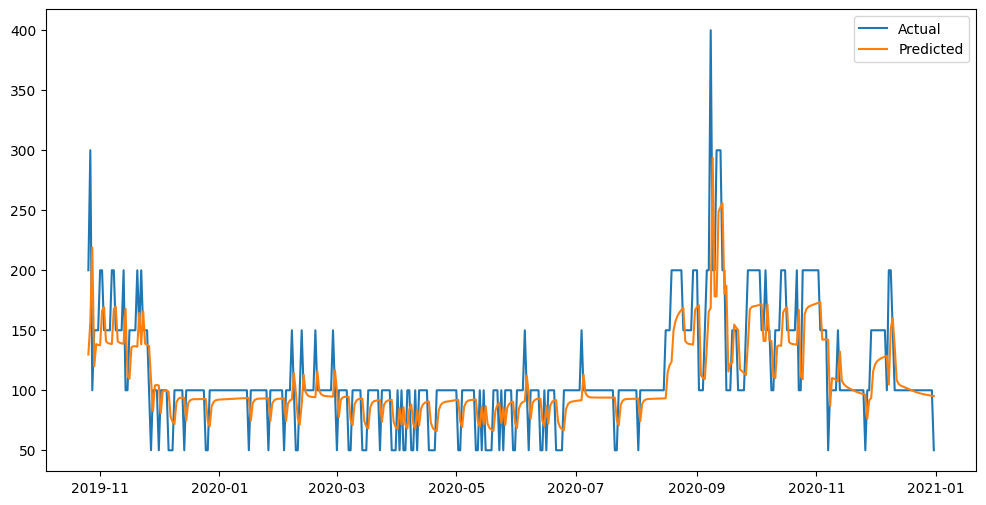

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['AQI'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictions, label='Predicted')
plt.legend()

In [ ]:
# Pollutant CO
combine['CO_scaled'] = scaler.fit_transform(combine['CO'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_CO, y_CO = create_sequences(combine['CO_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_CO_train, X_CO_test = X_CO[:train_size], X_CO[train_size:]
y_CO_train, y_CO_test = y_CO[:train_size], y_CO[train_size:]

In [ ]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model2.compile(optimizer='adam', loss='mse')

In [ ]:
X_CO_train = X_CO_train.reshape((X_CO_train.shape[0], X_CO_train.shape[1], 1))
# Train the model
model2.fit(X_CO_train, y_CO_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 3s 32ms/step - loss: 0.0075 - val_loss: 0.0064
Epoch 2/20
44/44 [==============================] - 1s 25ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 3/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0031 - val_loss: 0.0108
Epoch 4/20
44/44 [==============================] - 1s 24ms/step - loss: 0.0028 - val_loss: 0.0061
Epoch 5/20
44/44 [==============================] - 1s 22ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 6/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0025 - val_loss: 0.0078
Epoch 7/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 8/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 9/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 10/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 11/

In [ ]:
# make predictions
X_CO_test = X_CO_test.reshape((X_CO_test.shape[0], X_CO_test.shape[1], 1))
predictionsCO = model2.predict(X_CO_test)
predictionsCO = scaler.inverse_transform(predictionsCO)

14/14 [==============================] - 0s 5ms/step


In [ ]:
# evaluate the performance of the model
mseCO = mean_squared_error(combine['CO'][train_size+sequence_length:], predictionsCO)
print(f'Mean Squared Error: {mseCO}')

Mean Squared Error: 0.04225429167074212


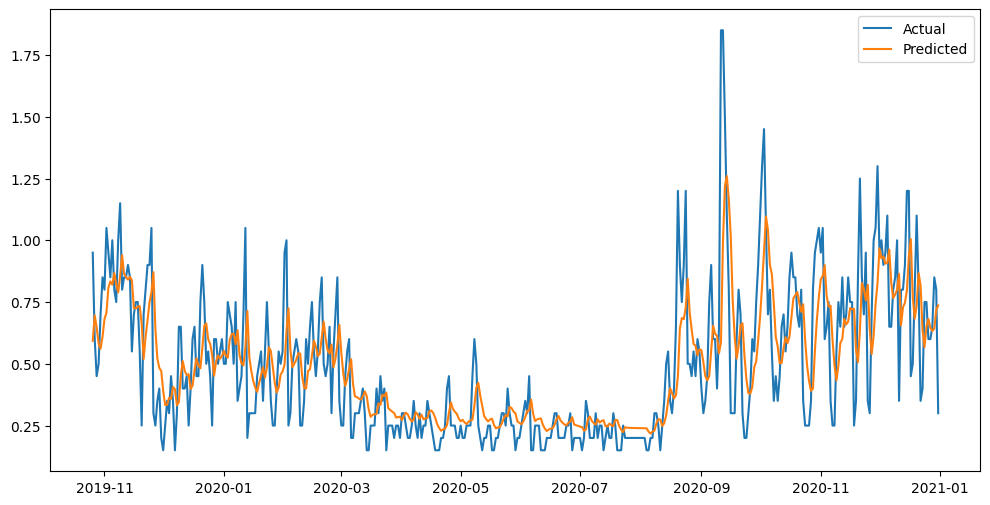

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['CO'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsCO, label='Predicted')
plt.legend()

In [ ]:
model2.save('Sacramento-CO.keras')

In [ ]:
model.save('Sacramento-AQI.keras')

In [ ]:
# Pollutant PM2.5
combine['PM2.5_scaled'] = scaler.fit_transform(combine['PM2.5'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_PM, y_PM = create_sequences(combine['PM2.5_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_PM_train, X_PM_test = X_PM[:train_size], X_PM[train_size:]
y_PM_train, y_PM_test = y_PM[:train_size], y_PM[train_size:]

In [ ]:
# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model3.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model3.compile(optimizer='adam', loss='mse')

In [ ]:
X_PM_train = X_PM_train.reshape((X_PM_train.shape[0], X_PM_train.shape[1], 1))
# Train the model
model3.fit(X_PM_train, y_PM_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 2s 21ms/step - loss: 0.0025 - val_loss: 0.0060
Epoch 2/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 3/20
44/44 [==============================] - 1s 24ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 4/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 5/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 6/20
44/44 [==============================] - 1s 27ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 7/20
44/44 [==============================] - 1s 27ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 8/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 9/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 10/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 11/

In [ ]:
# make predictions
X_PM_test = X_PM_test.reshape((X_PM_test.shape[0], X_PM_test.shape[1], 1))
predictionsPM = model3.predict(X_PM_test)
predictionsPM = scaler.inverse_transform(predictionsPM)

14/14 [==============================] - 1s 7ms/step


In [ ]:
# evaluate the performance of the model
msePM = mean_squared_error(combine['PM2.5'][train_size+sequence_length:], predictionsPM)
print(f'Mean Squared Error: {msePM}')

Mean Squared Error: 104.77464901127914


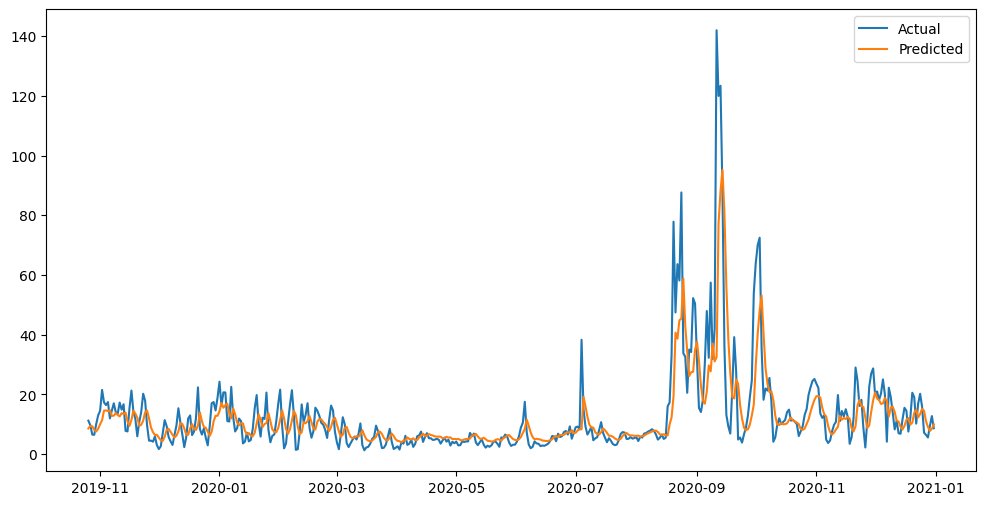

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['PM2.5'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsPM, label='Predicted')
plt.legend()

In [ ]:
model3.save('Sacramento-PM2.5.keras')